In [ ]:
using BoundaryValueDiffEq
using BenchmarkTools
using LaTeXStrings
using Statistics
using Plots

In [202]:
tspan = (0.0, 10_000.0);

In [203]:
function prob3!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = (t^2 - du - u*t)/u
end

prob3! (generic function with 1 method)

In [204]:
v0 = [-0.1^3-9*0.1*log(0.1), 0]

function bc!(residual, v, p, t)
    residual[1] = v[begin][1] + 1     # Dirichlet: u(0) = -1
    residual[2] = v[begin][2]   # Neumann: u'(0) = 0
end

bc! (generic function with 1 method)

In [205]:
bvp1 = BVProblem(prob3!, bc!, v0, tspan)
sol = solve(bvp1, MIRK4(), dt = 1, save_everystep=false, save_idxs = [1]);

In [206]:
t = LinRange(tspan[1], tspan[2], 50_000);
sol_interp = [s[1] for s in sol.(t)];

OneTerm(t) = -t^3/6;
TwoTerm(t) = -t^3/6 - 9*t*log(t);
ThreeTerm(t) = -t^3/6 - 9*t*log(t) - 81*t/8;

In [207]:
# Compute the difference between numerical and approximate solutions
function difference(f, g)
    v = f .- g
    cleanv = filter(!isnan, v)
    return v, cleanv
end

# Compute error metrics
Diff1, Diff1clean = difference(sol_interp, OneTerm.(t))
max_error1 = maximum(abs.(Diff1clean))
mean_error1 = mean(abs.(Diff1clean))
println("One-term approximation results")
println("Maximum absolute error: ", max_error1)
println("Mean absolute error: ", mean_error1, "\n")

println("Two-term approximation results")
Diff2, Diff2clean = difference(sol_interp, TwoTerm.(t))
max_error2 = maximum(abs.(Diff2clean))
mean_error2 = mean(abs.(Diff2clean))
println("Maximum absolute error: ", max_error2)
println("Mean absolute error: ", mean_error2, "\n")

println("Three-term approximation results")
Diff3, Diff3clean = difference(sol_interp, ThreeTerm.(t))
max_error3 = maximum(abs.(Diff3clean))
mean_error3 = mean(abs.(Diff3clean))
println("Maximum absolute error: ", max_error3)
println("Mean absolute error: ", mean_error3)

One-term approximation results
Maximum absolute error: 630488.0657348633
Mean absolute error: 292790.62402621954

Two-term approximation results
Maximum absolute error: 198442.56774902344
Mean absolute error: 99177.12694876792

Three-term approximation results
Maximum absolute error: 299692.56774902344
Mean absolute error: 149803.1389219395


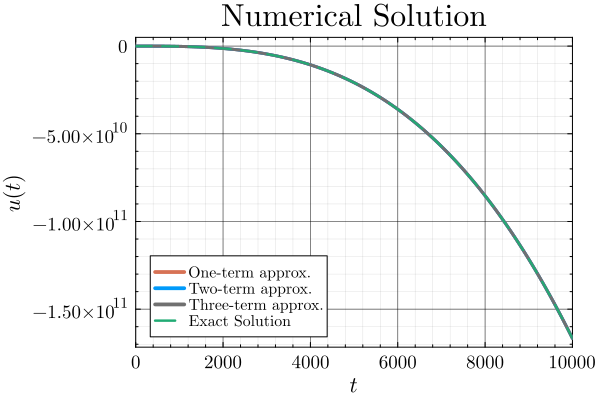

In [217]:
theme(:dao::Symbol)

compare = plot(t, OneTerm.(t),
    line=(3, :solid),
    label="One-term approx.")
compare = plot!(t, TwoTerm.(t),
    line=(3, :solid),
    label="Two-term approx.")
compare = plot!(t, ThreeTerm.(t),
    line=(3, :solid),
    label="Three-term approx.")
compare = plot!(sol,
    idxs=[1],
    line=(2, :dash),
    label="Exact Solution",
    title="Numerical Solution",
    legend=:bottomleft,
    xlabel=L"$t$",
    ylabel=L"$u(t)$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    right_margin=5*Plots.mm
    )
# savefig(compare, "Aero_Exam1_Prob3_compare2.pdf")

In [ ]:
d = plot(t, [abs.(Diff1), abs.(Diff2), abs.(Diff3)],
    line=(3, :solid),
    labels=[L"1"*"-term" L"2"*"-term" L"3"*"-term"],
    title="Relative Error n-term Approx.",
    legend=:best,
    xlabel=L"$t$",
    ylabel=L"$u(t)_{E}-u(t)_{A}$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    right_margin=5*Plots.mm
    )
# savefig(d, "Aero_Exam1_Prob3_diff.pdf")

"/home/belster/JuliaFiles/Aero/exam1/Aero_Exam1_Prob3_diff.pdf"